# Sentiment Prediction Using User Review Text

#### Khajan Joshi

### About the dataset

<br> The dataset is originally from the Yelp Dataset Kaggle competition which contains a lot of datasets from Yelp company.
<br> The dataset was originally provided in csv and json file format during the competition
<br> Recently, the dataset became unavailable on the kaggle server
<br> One very kind Kaggler converted the json file of the restaurant reviews of this competition to csv format and provided for public use
<br>
<br> I have used this csv file (which is not perfect and requires a lot of cleaning) for using in this notebook



Dataset: https://www.kaggle.com/yelp-dataset/yelp-dataset/version/6
<br>
csv converted reviews dataset: https://www.kaggle.com/xhlulu/convert-json-to-csv
<br>

<br> The dataset contains 2 attributes (text and stars)
<br> Text column contains the actual reviews written by various people. This column contains over 6 million reviews
<br> Stars column contains the rating provided by the users
<br> ratings are 1 to 5 (1 - bad review, 5 - good review)

#### The aim is to predict whether a particular review is of positive sentiment, or negative sentiment, just by analyzing the text

----
<br>


The following will be the steps involved in this notebook

1. Importing libraries
2. Importing the dataset
3. Text Preprocessing <br>
4. Creating a Word Embedding Model
5. Splitting train and Test Sets
6. Training various machine learning and deep learning models
7. Results and Comparison
8. Summary and Conclusion

# 1. Importing libraries

In [1]:
# importing the neccessary python libraries
import numpy as np
import pandas as pd

# For text preprocessing
import nltk # natural language tool kit library for text data
from nltk.corpus import stopwords # for removing junk words
from nltk.stem import WordNetLemmatizer # for converting the words to their lemma
import re # for the regular expression operations
from tensorflow.keras.preprocessing.text import one_hot # converting words to index values
from tensorflow.keras.preprocessing.sequence import pad_sequences # to create vectors of same length

# For preparing the sentences to an array of numbers using word embedding
from tensorflow.keras.layers import Embedding

# for splitting the data for model evaluation
from sklearn.model_selection import train_test_split

# for doing the predictions using various models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Model comparison and Plotting ROC-AUC
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, accuracy_score, matthews_corrcoef,f1_score

# For plotting
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter # for counting words
%matplotlib inline


In [2]:
# not required when not using google colab
#nltk.download('all')

# 2. Importing the dataset

In [3]:
# Let's look for the file name
!ls

NLP_REVIEWS_KHAJAN.ipynb           archive.zip
NLP_REVIEWS_KHAJANv2 VAEX.ipynb    reviews_final_df.csv
NLP_REVIEWS_KHAJANv2 colabv2.ipynb reviews_final_df.csv.hdf5
NLP_REVIEWS_KHAJANv2 copy.ipynb    reviews_final_df.csv.yaml
NLP_REVIEWS_KHAJANv2colab.ipynb    yelp_reviews.csv
NLP_REVIEWS_KHAJANv2fin.ipynb      yelp_reviews.csv.hdf5
Tutorial21                         yelp_reviews.csv_chunk_0..hdf5
archive                            yelp_reviews.csv_chunk_1..hdf5


In [4]:
# not required when not using google colab
#from google.colab import drive
#drive.mount('/content/gdrive')

So the file is yelp_reviews.csv

In [5]:
# not required when not using google colab
#dataset = pd.read_csv('/content/gdrive/MyDrive/yelp_reviews.csv')

# importing the dataset
dataset = pd.read_csv('yelp_reviews.csv')

/Users/khajan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
# taking a quick glance at the dataset

dataset.head(10)

,stars,text
0,1,Total bill for this horrible service? Over $8G...
1,5,I *adore* Travis at the Hard Rock's new Kelly ...
2,5,I have to say that this office really has it t...
3,5,Went in for a lunch. Steak sandwich was delici...
4,1,Today was my second out of three sessions I ha...
5,4,I'll be the first to admit that I was not exci...
6,3,Tracy dessert had a big name in Hong Kong and ...
7,1,This place has gone down hill. Clearly they h...
8,2,I was really looking forward to visiting after...
9,3,It's a giant Best Buy with 66 registers. I do...


In [7]:
# Let's see the number of rows and columns
dataset.shape

(6685902, 2)

In [8]:
# seeing the column names
dataset.columns

Index(['stars', 'text'], dtype='object')

In [9]:
# let's check the target variable details

dataset['stars'].value_counts()

5.0                                                                                                                                                                                                                                            2700898
4.0                                                                                                                                                                                                                                            1355845
1.0                                                                                                                                                                                                                                             922155
3.0                                                                                                                                                                                                                                             682774
2.0         

In [ ]:
# As we can see above, there is some issue with the datatypes of the 'stars' column.

In [10]:
# let's see if there are any nulls

dataset['stars'].isnull().value_counts()

False    6685902
Name: stars, dtype: int64

In [ ]:
# so there are no nulls as we got false for al he 6,685,902 rows

In [ ]:
# Now, I'll clean the 'stars' column step by step

In [11]:
# finding the location of the text records
dataset.loc[dataset['stars']=='My husband and I had not purchased a home before and we definitely needed some hand holding. They were patient and professional. We got our dream home and the entire experience was awesome! Thank you so much ladies for a job well done!']

,stars,text
2823430,My husband and I had not purchased a home befo...,NaN


In [12]:
# let's confirm the text 

dataset.loc[2823430]

stars    My husband and I had not purchased a home befo...
text                                                   NaN
Name: 2823430, dtype: object

In [13]:
# Dropping the column

dataset_fixed = dataset.drop(index = 2823430)

In [14]:
#Let's see 'stars' column values again

dataset_fixed['stars'].value_counts()

5.0                                                                                                                                                         2700898
4.0                                                                                                                                                         1355845
1.0                                                                                                                                                          922155
3.0                                                                                                                                                          682774
2.0                                                                                                                                                          499942
5.0                                                                                                                                                          232184
4.0             

In [15]:
# Repeating same as above
dataset_fixed.loc[dataset_fixed['stars']=='All the goodness of the deep South! Seasoned and pan bronzed. Mississippi catfish served over Gouda grits with an andouille sausage and mushroom ragout.']

,stars,text
3962507,All the goodness of the deep South! Seasoned a...,NaN


In [16]:
dataset_fixed = dataset_fixed.drop(index = 3962507)

In [17]:
# Let's see 'stars' column after dropping the text records
dataset_fixed['stars'].value_counts()

5.0    2700898
4.0    1355845
1.0     922155
3.0     682774
2.0     499942
5.0     232184
4.0     113140
1.0      80004
3.0      56506
2.0      42452
Name: stars, dtype: int64

Looks like the datatype of all the inputs are not the same<br>
Let's confirm using str.strip()

In [18]:
print(dataset_fixed['stars'].str.strip().value_counts())

5.0    232184
4.0    113140
1.0     80004
3.0     56506
2.0     42452
Name: stars, dtype: int64


In [19]:
# Let's check using describe()

%%time
dataset_fixed.describe()

CPU times: user 17.8 s, sys: 981 ms, total: 18.8 s
Wall time: 18.9 s


,stars,text
count,6685900.0,6685898
unique,10.0,6668736
top,5.0,.
freq,2700898.0,20


Looks like there are 20 rows without any reviews and just a period symbol
<br>
Let's also drop those rows

In [20]:
dataset_fixed.loc[dataset_fixed['text']=='.']

,stars,text
329270,2,.
343344,1,.
473959,2,.
838110,5,.
2042335,5,.
2107435,5,.
2173947,5,.
2268327,3,.
2555893,1,.
2700206,5.0,.


In [21]:
dataset_fixed = dataset_fixed.drop(dataset_fixed[dataset_fixed['text'] == '.'].index)

In [22]:
dataset_fixed.describe()

,stars,text
count,6685880.0,6685878
unique,10.0,6668735
top,5.0,Went in to pay off a loan via shared branching...
freq,2700893.0,16


In [23]:
# So the ratings are still not in the same data type

dataset_fixed['stars'].value_counts()

5.0    2700893
4.0    1355844
1.0     922149
3.0     682773
2.0     499939
5.0     232182
4.0     113139
1.0      80003
3.0      56506
2.0      42452
Name: stars, dtype: int64

In [24]:
# let's convert all to float
dataset_fixed = dataset_fixed.astype({'stars':float})

In [25]:
dataset_fixed['stars'].value_counts()

5.0    2933075
4.0    1468983
1.0    1002152
3.0     739279
2.0     542391
Name: stars, dtype: int64

In [ ]:
# That fixes the 'stars' column
# Let's see it again

In [26]:
%%time
dataset_fixed.describe()

CPU times: user 211 ms, sys: 21.1 ms, total: 232 ms
Wall time: 246 ms


,stars
count,6.685880e+06
mean,3.716202e+00
std,1.463641e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
# Now, I will change all the reviews with ratings of 4 and 5 to class 1 (positive sentiment)
# and ratings 1,2 and 3 to class 0 (negative sentiment)
# These new classes will be the dependant variable for the dataset

In [27]:
dataset_fixed['stars'] = np.where(dataset_fixed['stars'] < 4, 0, dataset_fixed['stars'])
dataset_fixed['stars'] = np.where(dataset_fixed['stars'] > 3, 1, dataset_fixed['stars'])

In [28]:
# renaming the columns to review and sentiment

dataset_fixed.rename(columns={'text':'review','stars':'sentiment'},inplace=True)
dataset_fixed

,sentiment,review
0,0.0,Total bill for this horrible service? Over $8G...
1,1.0,I *adore* Travis at the Hard Rock's new Kelly ...
2,1.0,I have to say that this office really has it t...
3,1.0,Went in for a lunch. Steak sandwich was delici...
4,0.0,Today was my second out of three sessions I ha...
...,...,...
6685897,1.0,I have been coming here for years and this pla...
6685898,0.0,I think this owner and the owner of Amy's Baki...
6685899,1.0,"Off the grid Mexican in Vegas. Very tasty, qua..."
6685900,1.0,We hired Taco Naco to cater our family party a...


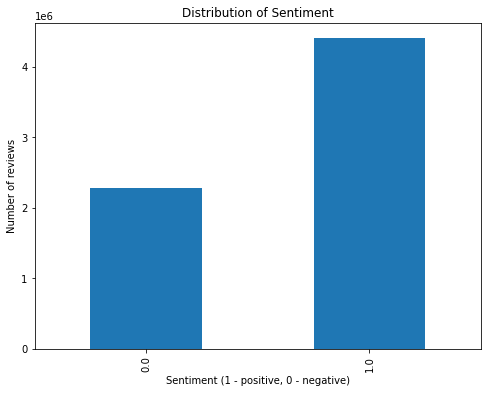

In [29]:
# Let's see how the distribution of both the classes is
fig = plt.figure(figsize=(8,6))
dataset_fixed.groupby('sentiment').review.count().plot.bar(ylim=0)

plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (1 - positive, 0 - negative)')
plt.ylabel('Number of reviews')
plt.show()

In [ ]:
# Look's like there are more positive reviews than negative review. 
# The dataset is quite imbalanced, but I will proceed with the further NLP processes using a subset of the dataset

#### USING A SUBSET OF THE DATASET FOR NLP AN MODEL COMPARISON

In [30]:
# Using a subset of the dataset for text pre-processing and machine learning. 
# Since the complete dataset is very large (over 4GB csv with 6 million rows) and require multiple GPUs to perform tests and evaluations multiple times 

df = dataset_fixed.head(66000)

In [31]:
# let's see the shape of our new dataframe

df.shape

(66000, 2)

# 3. Text-Preprocessing


In this section, I will prepare the dataset for further processes by doing the following:


    3.1. Clean the text
    3.2. Lower case all words
    3.3. tokenization
    3.4. Removal of stop words
    3.5. lemmatization

In [32]:
%%time
stop_words = stopwords.words('english') # defining a variable for storing the stopwords (“the”, “is”,“and”, etc. are stop words)
lemmatizer=WordNetLemmatizer() # creating the lemmatizer object
arr_fs=[] # creating an empty list which will store all the reviews after the pre-processing is complete
for index,row in df.iterrows():
    filter_sentence=[]
    sentence=row['review']
    sentence=re.sub(r'[^\w\s]','',str(sentence)) #cleaning the text to only contain words and whitespaces
    sentence=sentence.lower() # lowering the case so that words with capital letters will not be treated as separate words from their small case counterparts
    words=sentence.split() # doing tokenization using python's string split method. This is same as words=nltk.word_tokenize(sentence)
    words=[w for w in words if not w in stop_words] #stopwords removal
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word)) # joining the tokens of words to form the sentences back and also converting each word to it's base form or 'lemma'
    filter_sentence = ' '.join(filter_sentence)
    arr_fs.append(filter_sentence) # creating the array again containing all the reviews

CPU times: user 30.2 s, sys: 368 ms, total: 30.5 s
Wall time: 30.7 s


In [33]:
filter_sentence # sample sentence after pre-processing

'review bacon love bacon buy slab cut thick home sooo good salty like bacon perfect balance smoke meatiness even sometimes find bacon end cheap great pasta soup etc also usually get egg though believe loblaws carry rowe farm egg extension bloor st market manulife centre havent really tried much else used go stand st lawrence market saturday north market annex location cleaner bit convenient st lawrence need get early saturday thing tend sell though time havent bacon slab settle precut'

In [34]:
arr_fs # final array containing all the pre-processed text

['total bill horrible service 8gs crook actually nerve charge u 69 3 pill checked online pill 19 cent avoid hospital er cost',
 'adore travis hard rock new kelly cardenas salon im always fan great blowout stranger chain offer service however travis taken flawless blowout whole new level traviss greets perfectly green swoosh otherwise perfectly styled black hair vegasworthy rockstar outfit next come relaxing incredible shampoo get full head message could cure even worst migraine minute scented shampoo room travis freakishly strong finger good way use perfect amount pressure superb start glorious blowout one two three people involved best roundbrush action hair ever seen team stylist clearly get along extremely well evident way talk help one another really genuine corporate requirement much fun next travis started flat iron way flipped wrist get volume around without overdoing making look like texas pagent girl admirable also worth noting didnt fry hair something ive happen le skilled st

In [35]:
# creating a dataframe of the cleaned up text and assigning the name 'lemmatext' to the reviews

df2 = pd.DataFrame(arr_fs,columns= ['lemmatext'])

In [36]:
# Let's quickly compar with the old dataset
df

,sentiment,review
0,0.0,Total bill for this horrible service? Over $8G...
1,1.0,I *adore* Travis at the Hard Rock's new Kelly ...
2,1.0,I have to say that this office really has it t...
3,1.0,Went in for a lunch. Steak sandwich was delici...
4,0.0,Today was my second out of three sessions I ha...
...,...,...
65995,0.0,"I loved the open feel & atmosphere, it could b..."
65996,1.0,Sun transmission repaired my leak in a timely ...
65997,1.0,"Dont get me wrong, but this is a beautiful hot..."
65998,1.0,great place to go when Tacos El Gordo is too l...


In [37]:
# now the pre-processed dataset (this dataset does not have the Y variable, because it is not required for now. We will use it later during predictions)
df2

,lemmatext
0,total bill horrible service 8gs crook actually...
1,adore travis hard rock new kelly cardenas salo...
2,say office really together organized friendly ...
3,went lunch steak sandwich delicious caesar sal...
4,today second three session paid although first...
...,...
65995,loved open feel atmosphere could fantastic pla...
65996,sun transmission repaired leak timely manner t...
65997,dont get wrong beautiful hotel great shopping ...
65998,great place go taco el gordo long wait


In [ ]:
# From df2, we can see that the pre-processing of the text has been done

### Visualizing the top words in the data

In [41]:
# Let's see the most frequently occuring words in the dataset by first creating a Counter object from Python's Collections module
top = Counter([item for sublist in df2['lemmatext'].apply(lambda x:str(x).split()) for item in sublist]) # iterating through each word in the dataset
top_df = pd.DataFrame(top.most_common(20)) # using the most_common function from Collections' Counter container
top_df.columns = ['Top Words','Number Of Occurances'] # naming the columns of the top_df
top_df.style.background_gradient(cmap='Greens') # adding a color gradient to make the order visually intuitive

,Top Words,Number Of Occurances
0,place,35010
1,food,34077
2,good,31570
3,great,28336
4,time,27966
5,service,24341
6,like,22972
7,get,22829
8,one,21852
9,would,19786


In [87]:
fig_top = px.bar(top_df, x='Number Of Occurances', y='Top Words', title='Top Words in Dataset', orientation='h', 
             width=700, height=700,color='Top Words') # plotting a bar chart of the top_df dataframe containing top words and the number of occurances
fig_top.show()

In [86]:
# Due to some open caveats between plotly and jupyter notebook versions, the above bar graph doesn't get displayed sometimes
# ref https://community.plotly.com/t/unable-to-see-plot-in-jupyter-notebook/29317/4
# The same graph was displayed outside this notebook with the command fig_top = plotly.offline.plot(fig_top) below. 
# Since this graph coudln't be displayed in this notebook, it is shown in the ppt (slide #2 - About the Dataset)

In [78]:
import plotly
from plotly import version
print (version)

<module 'plotly.version' from '/Users/khajan/opt/anaconda3/lib/python3.8/site-packages/plotly/version.py'>


In [79]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [85]:
# Viewing the graph on another tab. The graph is displayed in the ppt
fig_top = plotly.offline.plot(fig_top)

# 4. Creating a Word Embedding Model

In [38]:
# Creating a variable called unique_words, and assigning 30,000 to it (assuming there would be not more than 30,000 unique words in the dataset)
unique_words = 30000

In [39]:
# For giving the data to the model for predictions, we need to convert each word in the above sentences, to a one-hot representation (to be uniquely identified with an index value)
# If the same word occurs twice, both will be having the same index value.
# assigning the encoding to be done for upto 30000 different words
onehot_representation = [one_hot(words,unique_words)for words in arr_fs] 
onehot_representation

[[14684,
  8009,
  19239,
  5084,
  22128,
  21358,
  10054,
  640,
  21584,
  9440,
  23294,
  28769,
  16586,
  19369,
  13987,
  16586,
  23674,
  6695,
  681,
  23232,
  723,
  2729],
 [15674,
  5012,
  11108,
  10276,
  21922,
  17370,
  18262,
  2789,
  19538,
  21841,
  21761,
  24938,
  1238,
  10421,
  9137,
  16206,
  5084,
  21852,
  5012,
  26084,
  9768,
  1238,
  8496,
  21922,
  29828,
  16750,
  116,
  2112,
  16187,
  9673,
  3798,
  2112,
  29799,
  27117,
  29189,
  22850,
  17673,
  8915,
  19878,
  26647,
  867,
  9411,
  10474,
  28839,
  14756,
  24431,
  19617,
  20705,
  24233,
  22417,
  19883,
  9407,
  1143,
  24325,
  10474,
  2423,
  5012,
  14249,
  29009,
  15196,
  17100,
  9500,
  2576,
  28970,
  7208,
  28127,
  2311,
  20826,
  5028,
  1238,
  7697,
  4346,
  6428,
  25821,
  11710,
  1658,
  12430,
  27794,
  29189,
  15091,
  5601,
  21442,
  17772,
  17811,
  28839,
  6750,
  21108,
  16416,
  28407,
  9500,
  4629,
  27339,
  7697,
  22620,
  11

In [43]:
# considering 2000 words in the sentences as max
# To make the arrays of consistent size, we can pad zeros before or after the one hot representations 
# Here I'll pad the zeros in front using 'pre'
sentence_length=2000
embedded_document=pad_sequences(onehot_representation,padding='pre',maxlen=sentence_length)
print(embedded_document) # let's see the final arrays

[[    0     0     0 ... 26836 21387  7819]
 [    0     0     0 ... 25794 25011 22875]
 [    0     0     0 ...  9363 10354  6681]
 ...
 [    0     0     0 ...  4911  5547 23154]
 [    0     0     0 ... 28804 28183 29528]
 [    0     0     0 ... 27812 29953  8115]]


#### Now, the X and Y for the models

In [44]:
# creating the X and Y for the models
X=np.array(embedded_document)
Y=np.array(df['sentiment'])

In [45]:
X

array([[    0,     0,     0, ..., 26836, 21387,  7819],
       [    0,     0,     0, ..., 25794, 25011, 22875],
       [    0,     0,     0, ...,  9363, 10354,  6681],
       ...,
       [    0,     0,     0, ...,  4911,  5547, 23154],
       [    0,     0,     0, ..., 28804, 28183, 29528],
       [    0,     0,     0, ..., 27812, 29953,  8115]], dtype=int32)

In [46]:
Y

array([0., 1., 1., ..., 1., 1., 1.])

In [47]:
X.shape,Y.shape

((66000, 2000), (66000,))

# 5. Splitting Train and Test sets

In [48]:
# Splitting the data to training and testing sets with 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 6. Training various machine learning and deep learning models

## MODEL 1: LSTM RNN

In [49]:
## Creating an LSTM Recural Neural Network model

# The steps involved in creating the LSTM RNN model will be creating an embedded layer
# The parameters this embedding layer accepts is, 
#  1. the vocabulary size (unique words), 
#  2. embedding input features and the 
#  3. length of the sentence (2000)

embedding_vector_features=200 # giving the embedding layer an input vector with 200 features
model1=Sequential()
model1.add(Embedding(unique_words,embedding_vector_features,input_length=sentence_length)) 
model1.add(LSTM(100)) # adding an arbitrary value of 100 neurons in the LSTM layer
model1.add(Dense(1,activation='sigmoid')) # the final dense layer will be one neuron with value 1 or 0, with sigmoid activation function
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # compiling and assigning the metrics
print(model1.summary()) # let's see the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 200)         6000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               120400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 6,120,501
Trainable params: 6,120,501
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
### Fitting the above LSTM model on X train and Y train, with the validation set being X text and Y test. epochs are set at 10 and batch size is 50
model1_fit = model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=50)

Epoch 1/10
1056/1056 [==============================] - 1337s 1s/step - loss: 0.3179 - accuracy: 0.8638 - val_loss: 0.3061 - val_accuracy: 0.8803
Epoch 2/10
1056/1056 [==============================] - 1397s 1s/step - loss: 0.2096 - accuracy: 0.9172 - val_loss: 0.3012 - val_accuracy: 0.8858
Epoch 3/10
1056/1056 [==============================] - 1530s 1s/step - loss: 0.1517 - accuracy: 0.9419 - val_loss: 0.3201 - val_accuracy: 0.8809
Epoch 4/10
1056/1056 [==============================] - 1457s 1s/step - loss: 0.1091 - accuracy: 0.9584 - val_loss: 0.3703 - val_accuracy: 0.8723
Epoch 5/10
1056/1056 [==============================] - 1403s 1s/step - loss: 0.0780 - accuracy: 0.9713 - val_loss: 0.4344 - val_accuracy: 0.8699
Epoch 6/10
1056/1056 [==============================] - 1392s 1s/step - loss: 0.0568 - accuracy: 0.9803 - val_loss: 0.4739 - val_accuracy: 0.8690
Epoch 7/10
1056/1056 [==============================] - 1371s 1s/step - loss: 0.0398 - accuracy: 0.9858 - val_loss: 0.6029 -

In [51]:
# only applicable on google colab (to see if any gpu is being used)
#import tensorflow as tf
#tf.test.gpu_device_name()

In [52]:
# only applicable on google colab (to see the available cpu and gpu)
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

### Evaluating the LSTM model

#### Epoch versus train set accuracy, and validation set accuracy

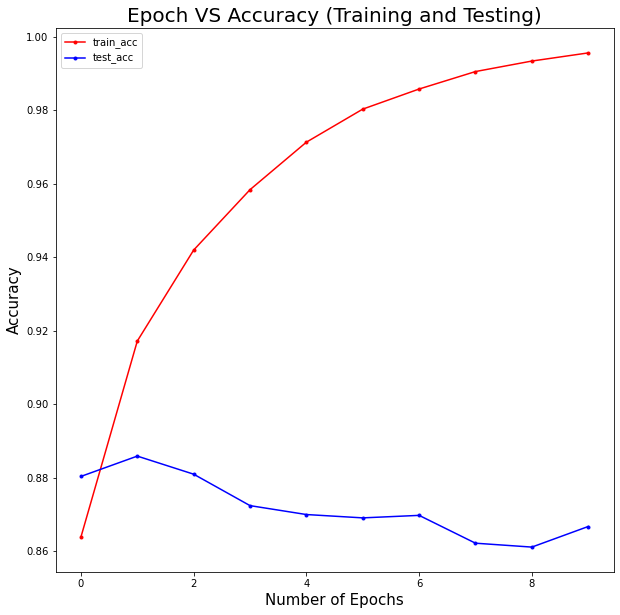

In [53]:
# plotting the epochs on the x axis and accuracy on y axis. Red is for training accuracy and blue for validation set
fig, ax = plt.subplots(figsize=(10,10))
plt.xlabel("Number of Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.title("Epoch VS Accuracy (Training and Testing)",fontsize=20)
ax.plot(model1_fit.history["accuracy"],'r', marker='.', label="train_acc")
ax.plot(model1_fit.history["val_accuracy"],'b', marker='.', label="test_acc")
ax.legend(loc=0)
plt.show()

#### We can see above, that the training accuracy is close to 100%, but the validation set has an accuracy of around 88 to 86%

In [54]:
# Now, predicting
y_pred=model1.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [55]:
# storing the confusion matrix into a variable
cm_lstm = confusion_matrix(Y_test,y_pred)

In [56]:
# converting the confusion matrix to a pandas dataframe
cm_lstm_df = pd.DataFrame(cm_lstm)
cm_lstm_df

,0,1
0,3479,889
1,871,7961


#### ROC curves, AUC values. 

#### Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)

      0     1
0  3479   889
1   871  7961
tp_lstm =  3479
tn_lstm =  7961
fp_lstm =  889
fn_lstm =  871

recall_lstm =  0.7997701149425287      precision_lstm =  0.7964743589743589

f1 score_lstm =  0.7981188345950907

scores_lstm = 
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      4368
         1.0       0.90      0.90      0.90      8832

    accuracy                           0.87     13200
   macro avg       0.85      0.85      0.85     13200
weighted avg       0.87      0.87      0.87     13200



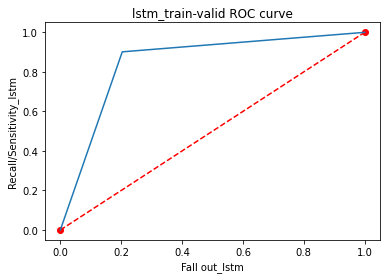

roc-auc is 0.849


In [57]:
print(cm_lstm_df)
tp_lstm = cm_lstm_df.loc[0,0]
print('tp_lstm = ',tp_lstm)

tn_lstm = cm_lstm_df.loc[1,1]
print('tn_lstm = ',tn_lstm)

fp_lstm = cm_lstm_df.loc[0,1]
print('fp_lstm = ',fp_lstm)

fn_lstm = cm_lstm_df.loc[1,0]
print('fn_lstm = ',fn_lstm)

# Recall (Sensitivity) = tp/tp+fn, Precision = tp/tp+fp

recall_lstm = tp_lstm/(tp_lstm+fn_lstm)
precision_lstm = tp_lstm/(tp_lstm+fp_lstm)
print('\nrecall_lstm = ',recall_lstm,'     precision_lstm = ',precision_lstm)

#F1 score = 2*(precision * recall)/precision + recall

f_score_lstm = (2*recall_lstm*precision_lstm)/(recall_lstm+precision_lstm)
print('\nf1 score_lstm = ',f_score_lstm)

# using the built in scikit-learn function to do this at one go!

scores_lstm = classification_report(Y_test,y_pred)
print('\nscores_lstm = \n',scores_lstm)

rec_lstm, fall_out_lstm, thresholds_lstm = roc_curve(Y_test,y_pred)

plt.plot([0,1],[0,1],'ro--')
plt.plot(rec_lstm,fall_out_lstm, label='LSTM RNN Model')
plt.xlabel('Fall out_lstm')
plt.ylabel('Recall/Sensitivity_lstm')
plt.title('lstm_train-valid ROC curve')
plt.show()

# AUC value:
print('roc-auc is {:.3f}'.format(roc_auc_score(Y_test,y_pred)))




In [58]:
# Let's check accuracy
Accuracy_LSTM = accuracy_score(Y_test,y_pred)
Accuracy_LSTM

0.8666666666666667

In [ ]:
# Accuracy is around 86% for the RNN on the test data. Looks like there is some overfitting

### Dropout (model 2)

In [ ]:
# Quickly adding doprout layers to check if the model performs better

In [101]:
## Creating the model with dropout
embedding_vector_features=200
model2=Sequential()
model2.add(Embedding(unique_words,embedding_vector_features,input_length=sentence_length))
model2.add(Dropout(0.3))
model2.add(LSTM(100))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2000, 200)         6000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2000, 200)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 6,120,501
Trainable params: 6,120,501
Non-trainable params: 0
_________________________________________________________________
None


In [103]:
### Now, fitting the above LSTM model with the dropouts on X train and Y train, with the validation set being X text and Y test. epochs are set at 10 and batch size is 50
model2_fit = model2.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=50)

Epoch 1/10
1056/1056 [==============================] - 1516s 1s/step - loss: 0.3230 - accuracy: 0.8654 - val_loss: 0.2766 - val_accuracy: 0.8849
Epoch 2/10
1056/1056 [==============================] - 1545s 1s/step - loss: 0.2171 - accuracy: 0.9154 - val_loss: 0.2888 - val_accuracy: 0.8833
Epoch 3/10
1056/1056 [==============================] - 1473s 1s/step - loss: 0.1781 - accuracy: 0.9301 - val_loss: 0.3170 - val_accuracy: 0.8760
Epoch 4/10
1056/1056 [==============================] - 1476s 1s/step - loss: 0.1287 - accuracy: 0.9499 - val_loss: 0.3766 - val_accuracy: 0.8707
Epoch 5/10
1056/1056 [==============================] - 1485s 1s/step - loss: 0.1028 - accuracy: 0.9619 - val_loss: 0.4369 - val_accuracy: 0.8552
Epoch 6/10
1056/1056 [==============================] - 1402s 1s/step - loss: 0.0779 - accuracy: 0.9717 - val_loss: 0.4707 - val_accuracy: 0.8661
Epoch 7/10
1056/1056 [==============================] - 1398s 1s/step - loss: 0.0599 - accuracy: 0.9785 - val_loss: 0.5538 -

### Evaluating the LSTM - Dropout model

#### Epoch versus train set accuracy, and validation set accuracy

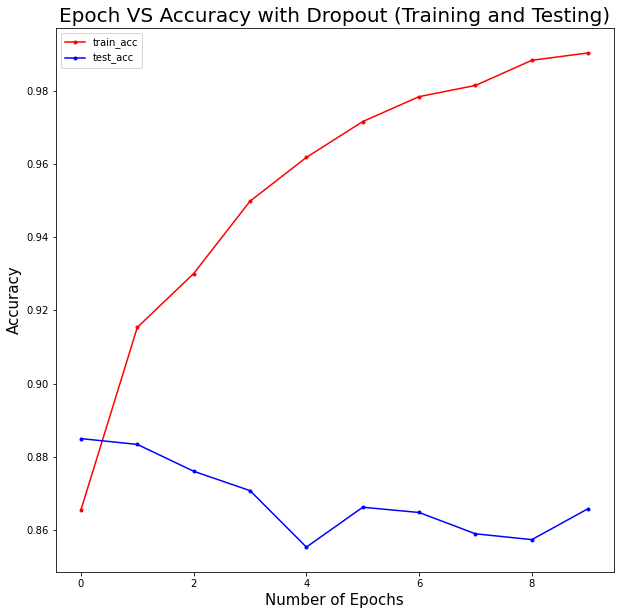

In [104]:
# plotting the epochs on the x axis and accuracy on y axis. Red is for training accuracy and blue for validation set
fig, ax = plt.subplots(figsize=(10,10))
plt.xlabel("Number of Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.title("Epoch VS Accuracy with Dropout (Training and Testing)",fontsize=20)
ax.plot(model2_fit.history["accuracy"],'r', marker='.', label="train_acc")
ax.plot(model2_fit.history["val_accuracy"],'b', marker='.', label="test_acc")
ax.legend(loc=0)
plt.show()

In [107]:
y_pred_dropout=model2.predict_classes(X_test)

In [108]:
cm_lstm_dropout = confusion_matrix(Y_test,y_pred_dropout)

In [109]:
cm_lstm_dropout_df = pd.DataFrame(cm_lstm_dropout)
cm_lstm_dropout_df

,0,1
0,3338,1030
1,742,8090


#### ROC curves, AUC values. 

#### Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)

      0     1
0  3338  1030
1   742  8090
tp_lstm =  3338
tn_lstm =  8090
fp_lstm =  1030
fn_lstm =  742

recall_lstm_dropout =  0.8181372549019608      precision_lstm_dropout =  0.7641941391941391

f1 score_lstm_dropout =  0.790246212121212

scores_lstm_dropout = 
               precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      4368
         1.0       0.89      0.92      0.90      8832

    accuracy                           0.87     13200
   macro avg       0.85      0.84      0.85     13200
weighted avg       0.86      0.87      0.86     13200



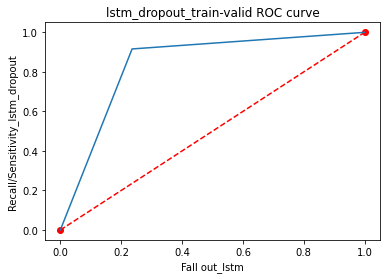

roc-auc is 0.840


In [110]:
print(cm_lstm_dropout_df)
tp_lstm_dropout = cm_lstm_dropout_df.loc[0,0]
print('tp_lstm = ',tp_lstm_dropout)

tn_lstm_dropout = cm_lstm_dropout_df.loc[1,1]
print('tn_lstm = ',tn_lstm_dropout)

fp_lstm_dropout = cm_lstm_dropout_df.loc[0,1]
print('fp_lstm = ',fp_lstm_dropout)

fn_lstm_dropout = cm_lstm_dropout_df.loc[1,0]
print('fn_lstm = ',fn_lstm_dropout)

# Recall (Sensitivity) = tp/tp+fn, Precision = tp/tp+fp

recall_lstm_dropout = tp_lstm_dropout/(tp_lstm_dropout+fn_lstm_dropout)
precision_lstm_dropout = tp_lstm_dropout/(tp_lstm_dropout+fp_lstm_dropout)
print('\nrecall_lstm_dropout = ',recall_lstm_dropout,'     precision_lstm_dropout = ',precision_lstm_dropout)

#F1 score = 2*(precision * recall)/precision + recall

f_score_lstm_dropout = (2*recall_lstm_dropout*precision_lstm_dropout)/(recall_lstm_dropout+precision_lstm_dropout)
print('\nf1 score_lstm_dropout = ',f_score_lstm_dropout)

# using the built in scikit-learn function to do this at one go!

scores_lstm_dropout = classification_report(Y_test,y_pred_dropout)
print('\nscores_lstm_dropout = \n',scores_lstm_dropout)

rec_lstm_dropout, fall_out_lstm_dropout, thresholds_lstm_dropout = roc_curve(Y_test,y_pred_dropout)

plt.plot([0,1],[0,1],'ro--')
plt.plot(rec_lstm_dropout,fall_out_lstm_dropout, label='LSTM with dropout Model')
plt.xlabel('Fall out_lstm')
plt.ylabel('Recall/Sensitivity_lstm_dropout')
plt.title('lstm_dropout_train-valid ROC curve')
plt.show()

# AUC value:
print('roc-auc is {:.3f}'.format(roc_auc_score(Y_test,y_pred_dropout)))




In [111]:
Accuracy_LSTM_dropout = accuracy_score(Y_test,y_pred_dropout)
Accuracy_LSTM_dropout

0.8657575757575757

In [ ]:
# The model didn't perform any better with the dropouts

## MODEL 3: MULTINOMIAL NAIVE BAYES

In [84]:
# Let's check the performance using a Multinomial Naive Bayes Model
%%time
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

CPU times: user 1.81 s, sys: 701 ms, total: 2.51 s
Wall time: 3.11 s


MultinomialNB()

In [ ]:
# It's really fast in comparison to the neural network. 
# This is because Naive Bayes uses simple probability and does not have any "epochs" or "iterations" or even any "back propagation"

### Evaluating the Naive Bayes model

In [85]:
Y_pred_NaiveBayes = model3.predict(X_test)
Y_pred_NaiveBayes

array([1., 1., 1., ..., 1., 1., 1.])

In [86]:
cm_NaiveBayes = confusion_matrix(Y_test, Y_pred_NaiveBayes) 
cm_NaiveBayes

array([[1164, 3204],
       [1211, 7621]])

In [87]:
cm_NaiveBayes_df = pd.DataFrame(cm_NaiveBayes)
cm_NaiveBayes_df

,0,1
0,1164,3204
1,1211,7621


#### ROC curves, AUC values. 

#### Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)

      0     1
0  1164  3204
1  1211  7621
tp_NaiveBayes =  1164
tn_NaiveBayes =  7621
fp_NaiveBayes =  3204
fn_NaiveBayes =  1211

recall_NaiveBayes =  0.4901052631578947      precision_NaiveBayes =  0.2664835164835165

f1 score_NaiveBayes =  0.34524692273468777

scores_NaiveBayes = 
               precision    recall  f1-score   support

         0.0       0.49      0.27      0.35      4368
         1.0       0.70      0.86      0.78      8832

    accuracy                           0.67     13200
   macro avg       0.60      0.56      0.56     13200
weighted avg       0.63      0.67      0.63     13200



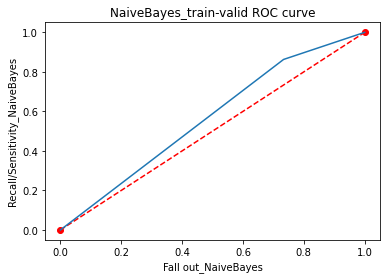

roc-auc is 0.565


In [88]:
print(cm_NaiveBayes_df)
tp_NaiveBayes = cm_NaiveBayes_df.loc[0,0]
print('tp_NaiveBayes = ',tp_NaiveBayes)

tn_NaiveBayes = cm_NaiveBayes_df.loc[1,1]
print('tn_NaiveBayes = ',tn_NaiveBayes)

fp_NaiveBayes = cm_NaiveBayes_df.loc[0,1]
print('fp_NaiveBayes = ',fp_NaiveBayes)

fn_NaiveBayes = cm_NaiveBayes_df.loc[1,0]
print('fn_NaiveBayes = ',fn_NaiveBayes)

# Recall (Sensitivity) = tp/tp+fn, Precision = tp/tp+fp

recall_NaiveBayes = tp_NaiveBayes/(tp_NaiveBayes+fn_NaiveBayes)
precision_NaiveBayes = tp_NaiveBayes/(tp_NaiveBayes+fp_NaiveBayes)
print('\nrecall_NaiveBayes = ',recall_NaiveBayes,'     precision_NaiveBayes = ',precision_NaiveBayes)

#F1 score = 2*(precision * recall)/precision + recall

f_score_NaiveBayes = (2*recall_NaiveBayes*precision_NaiveBayes)/(recall_NaiveBayes+precision_NaiveBayes)
print('\nf1 score_NaiveBayes = ',f_score_NaiveBayes)

# using the built in scikit-learn function to do this at one go!

scores_NaiveBayes = classification_report(Y_test, Y_pred_NaiveBayes)
print('\nscores_NaiveBayes = \n',scores_NaiveBayes)

rec_NaiveBayes, fall_out_NaiveBayes, thresholds_NaiveBayes = roc_curve(Y_test, Y_pred_NaiveBayes)

plt.plot([0,1],[0,1],'ro--')
plt.plot(rec_NaiveBayes,fall_out_NaiveBayes, label='Naive Bayes Model')
plt.xlabel('Fall out_NaiveBayes')
plt.ylabel('Recall/Sensitivity_NaiveBayes')
plt.title('NaiveBayes_train-valid ROC curve')
plt.show()

# AUC value:
print('roc-auc is {:.3f}'.format(roc_auc_score(Y_test, Y_pred_NaiveBayes)))


In [89]:
Accuracy_NaiveBayes = accuracy_score(Y_test,Y_pred_NaiveBayes)
Accuracy_NaiveBayes

0.665530303030303

In [ ]:
# This model doesn't seem to be so good
# Let's see with Random Forests

## MODEL 4: RANDOM FOREST

In [90]:
%%time
model4 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
model4.fit(X_train, Y_train)

CPU times: user 8min 59s, sys: 2.7 s, total: 9min 2s
Wall time: 9min 3s


RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

### Evaluating the RANDOM FOREST model

In [91]:
Y_pred_RandomForest = model4.predict(X_test)

In [92]:
cm_RandomForest = confusion_matrix(Y_test, Y_pred_RandomForest)
cm_RandomForest

array([[ 335, 4033],
       [ 294, 8538]])

In [93]:
cm_RandomForest_df = pd.DataFrame(cm_RandomForest)
cm_RandomForest_df

,0,1
0,335,4033
1,294,8538


#### ROC curves, AUC values. 

#### Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)

     0     1
0  335  4033
1  294  8538
tp_RandomForest =  335
tn_RandomForest =  8538
fp_RandomForest =  4033
fn_RandomForest =  294

recall_RandomForest =  0.5325914149443561      precision_RandomForest =  0.0766941391941392

f1 score_RandomForest =  0.13408044826896137

scores_RandomForest = 
               precision    recall  f1-score   support

         0.0       0.53      0.08      0.13      4368
         1.0       0.68      0.97      0.80      8832

    accuracy                           0.67     13200
   macro avg       0.61      0.52      0.47     13200
weighted avg       0.63      0.67      0.58     13200



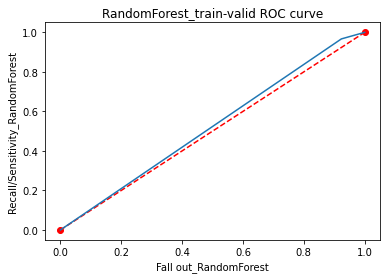

roc-auc is 0.522


In [94]:
print(cm_RandomForest_df)
tp_RandomForest = cm_RandomForest_df.loc[0,0]
print('tp_RandomForest = ',tp_RandomForest)

tn_RandomForest = cm_RandomForest_df.loc[1,1]
print('tn_RandomForest = ',tn_RandomForest)

fp_RandomForest = cm_RandomForest_df.loc[0,1]
print('fp_RandomForest = ',fp_RandomForest)

fn_RandomForest = cm_RandomForest_df.loc[1,0]
print('fn_RandomForest = ',fn_RandomForest)

# Recall (Sensitivity) = tp/tp+fn, Precision = tp/tp+fp

recall_RandomForest = tp_RandomForest/(tp_RandomForest+fn_RandomForest)
precision_RandomForest = tp_RandomForest/(tp_RandomForest+fp_RandomForest)
print('\nrecall_RandomForest = ',recall_RandomForest,'     precision_RandomForest = ',precision_RandomForest)

#F1 score = 2*(precision * recall)/precision + recall

f_score_RandomForest = (2*recall_RandomForest*precision_RandomForest)/(recall_RandomForest+precision_RandomForest)
print('\nf1 score_RandomForest = ',f_score_RandomForest)

# using the built in scikit-learn function to do this at one go!

scores_RandomForest = classification_report(Y_test, Y_pred_RandomForest)
print('\nscores_RandomForest = \n',scores_RandomForest)

rec_RandomForest, fall_out_RandomForest, thresholds_RandomForest = roc_curve(Y_test, Y_pred_RandomForest)

plt.plot([0,1],[0,1],'ro--')
plt.plot(rec_RandomForest,fall_out_RandomForest, label='Random Forest Model')
plt.xlabel('Fall out_RandomForest')
plt.ylabel('Recall/Sensitivity_RandomForest')
plt.title('RandomForest_train-valid ROC curve')
plt.show()

# AUC value:
print('roc-auc is {:.3f}'.format(roc_auc_score(Y_test, Y_pred_RandomForest)))



In [95]:
Accuracy_RandomForest = accuracy_score(Y_test,Y_pred_RandomForest)
Accuracy_RandomForest

0.6721969696969697

In [ ]:
#Not so good either
# Let's compare in detail, all the 4 models' evaluation metrics for this text data

# 7. Results and Comparisons

#### Accuracies:

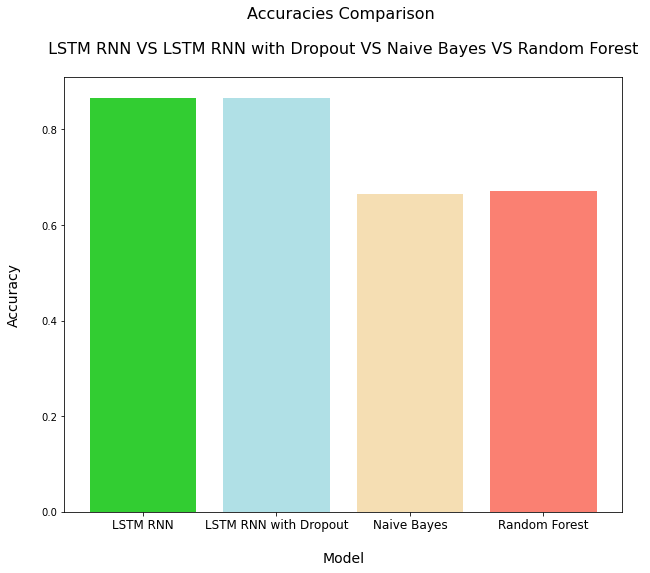

In [112]:
Accuracies = [Accuracy_LSTM, Accuracy_LSTM_dropout, Accuracy_NaiveBayes, Accuracy_RandomForest] # For plotting the accuracies (calculated above)
Models = ['LSTM RNN', 'LSTM RNN with Dropout', 'Naive Bayes','Random Forest'] # Labels
Accuracy_loc = np.arange(len(Models))
plt.figure(figsize=(10,8))
plt.title('Accuracies Comparison \n\n LSTM RNN VS LSTM RNN with Dropout VS Naive Bayes VS Random Forest \n ', fontsize=16)
plt.xlabel('Model',fontsize=14,labelpad=20)
plt.ylabel('Accuracy',fontsize=14,labelpad=20)
plt.bar(Accuracy_loc, Accuracies,color = ['limegreen','powderblue','wheat','salmon'])
plt.xticks(Accuracy_loc, Models,fontsize=12)
plt.show()

#### Recall:

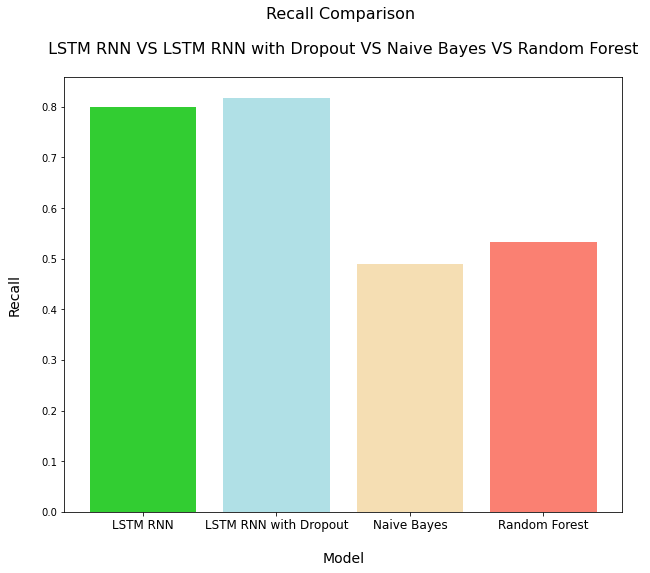

In [113]:
Recalls = [recall_lstm, recall_lstm_dropout, recall_NaiveBayes, recall_RandomForest] # recall
Recall_loc = np.arange(len(Models))
plt.figure(figsize=(10,8))
plt.title('Recall Comparison \n\n LSTM RNN VS LSTM RNN with Dropout VS Naive Bayes VS Random Forest \n ', fontsize=16)
plt.xlabel('Model',fontsize=14,labelpad=20)
plt.ylabel('Recall',fontsize=14,labelpad=20)
plt.bar(Recall_loc, Recalls,color = ['limegreen','powderblue','wheat','salmon'])
plt.xticks(Recall_loc, Models,fontsize=12)
plt.show()

#### Precision:

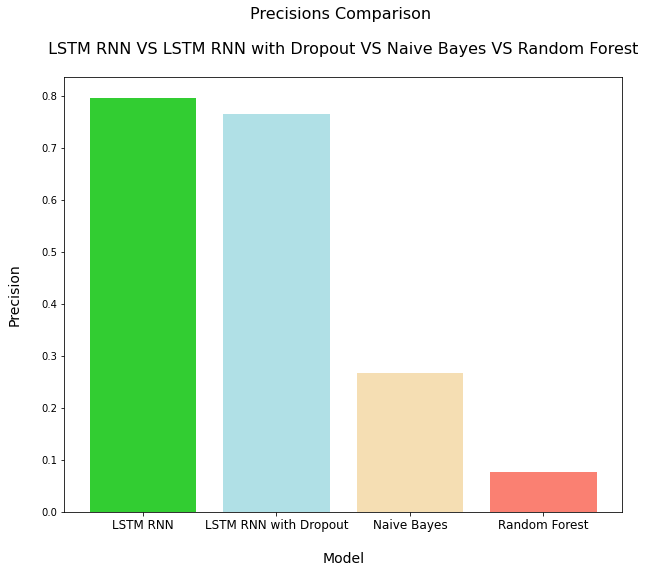

In [114]:
Precisions = [precision_lstm, precision_lstm_dropout, precision_NaiveBayes, precision_RandomForest] # precision
Precision_loc = np.arange(len(Models))
plt.figure(figsize=(10,8))
plt.title('Precisions Comparison \n\n LSTM RNN VS LSTM RNN with Dropout VS Naive Bayes VS Random Forest \n ', fontsize=16)
plt.xlabel('Model',fontsize=14,labelpad=20)
plt.ylabel('Precision',fontsize=14,labelpad=20)
plt.bar(Precision_loc, Precisions,color = ['limegreen','powderblue','wheat','salmon'])
plt.xticks(Precision_loc, Models,fontsize=12)
plt.show()

#### F Score:

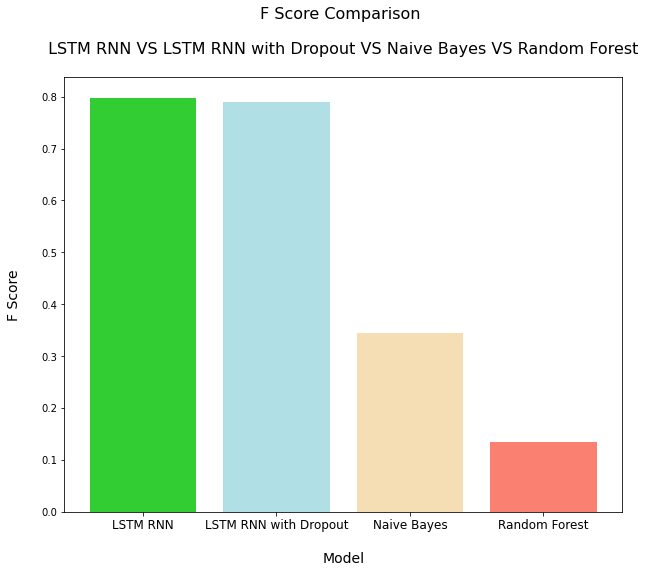

In [115]:
F_scores = [f_score_lstm, f_score_lstm_dropout, f_score_NaiveBayes, f_score_RandomForest] # F score
f_score_loc = np.arange(len(Models))
plt.figure(figsize=(10,8))
plt.title('F Score Comparison \n\n LSTM RNN VS LSTM RNN with Dropout VS Naive Bayes VS Random Forest \n ', fontsize=16)
plt.xlabel('Model',fontsize=14,labelpad=20)
plt.ylabel('F Score',fontsize=14,labelpad=20)
plt.bar(f_score_loc, F_scores,color = ['limegreen','powderblue','wheat','salmon'])
plt.xticks(f_score_loc, Models,fontsize=12)
plt.show()

# 8. Summary and Conclusion

In [ ]:
# We can see from the above graphs that the LSTM model performed the best
# With the dropout also, it was around the same performance
# In regards to precision and f score, the naive bayes and random forests performed very low

### Next Steps

There are some models which are transformer based such as BERT that have known to perform really well on text data
<br>
With Over 90% accuracy. That may make this dataset perform better for making predictions.
<br>
Another way of improving the generalizability of the model would be by fine-tuning the input vectors sizes for the LSTM
<br> 
And finally, by cleaning up the text data even more
<br>
Recently, some new libraries for text processing have been released which have shown to perform really well for text data. 
<br> One such library is HuggingFace. 
<br> Using this library, along with converting the csv to an hdf5 file using vaex can help speed up the pre-processing